In [1]:
import matplotlib.pylab as plt
import time
import keras
from keras.datasets import mnist,cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, Conv2D,MaxPool2D,Flatten,Dropout
from keras.optimizers import RMSprop
from keras import backend as k
k.tensorflow_backend._get_available_gpus()
import tensorflow as tf
from matplotlib.pyplot import imshow
import numpy as np

Using TensorFlow backend.


In [12]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

train_data = mnist.train
valid_data = mnist.validation
test_data = mnist.test

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [17]:
train_data.images.shape

(55000, 784)

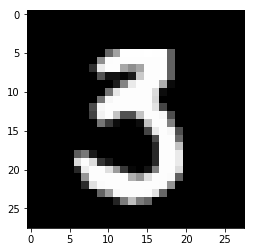

In [22]:
plt.imshow(train_data.images[80,:].reshape((28,28)),cmap='gray')

In [10]:
 def cons(x):  
    return tf.constant(x, dtype=tf.float32) 

def compute_hessian(fn, vars):  
    mat = []  
    for v1 in vars:  
        temp = []  
        for v2 in vars:  
            # computing derivative twice, first w.r.t v2 and then w.r.t v1  
            temp.append(tf.gradients(tf.gradients(f, v2)[0], v1)[0])  
        temp = [cons(0) if t == None else t for t in temp] # tensorflow returns None when there is no gradient, so we replace None with 0  
        temp = tf.stack(temp)  
        mat.append(temp)  
    mat = tf.stack(mat)  
    
    return mat  
  
x = tf.Variable(np.random.random_sample(), dtype=tf.float32)  
  
f = tf.sin(x) 
# arg1: our defined function, arg2: list of tf variables associated with the function  
hessian = compute_hessian(f, [x])  
  
sess = tf.Session()  
sess.run(tf.global_variables_initializer())  
print(sess.run(hessian))  

[[-0.69186085]]


In [7]:
np.random.random_sample()

0.11157203546499916